In [1]:
# importing libraries and modules
import pandas as pd                    #pandas to load the dataframe
import numpy as np                     #numpy for numerical computing
import matplotlib.pyplot as plt        # matplotlib To visualize the data features i.e. barplot
import seaborn as sns                  #seaborn To see the correlation between features using heatmap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
# reading the dataset

df=pd.read_csv("C:\\Users\\Maha\\Downloads\\archive (9)\\Housing.csv")

In [3]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [4]:
# printing first 5 values of the dataset

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
# printing last 5 values of the dataset

df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [6]:
df.shape

(545, 13)

In [7]:
df.size

7085

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [9]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [10]:
df=pd.get_dummies(df[df.columns])

In [11]:
df

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,False,True,True,False,...,False,True,False,False,True,False,True,True,False,False
1,12250000,8960,4,4,4,3,False,True,True,False,...,False,True,False,False,True,True,False,True,False,False
2,12250000,9960,3,2,2,2,False,True,True,False,...,True,True,False,True,False,False,True,False,True,False
3,12215000,7500,4,2,2,3,False,True,True,False,...,True,True,False,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,False,True,False,True,...,True,True,False,False,True,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,False,True,True,False,...,True,True,False,True,False,True,False,False,False,True
541,1767150,2400,3,1,1,0,True,False,True,False,...,False,True,False,True,False,True,False,False,True,False
542,1750000,3620,2,1,1,0,False,True,True,False,...,False,True,False,True,False,True,False,False,False,True
543,1750000,2910,3,1,1,0,True,False,True,False,...,False,True,False,True,False,True,False,True,False,False


<Axes: >

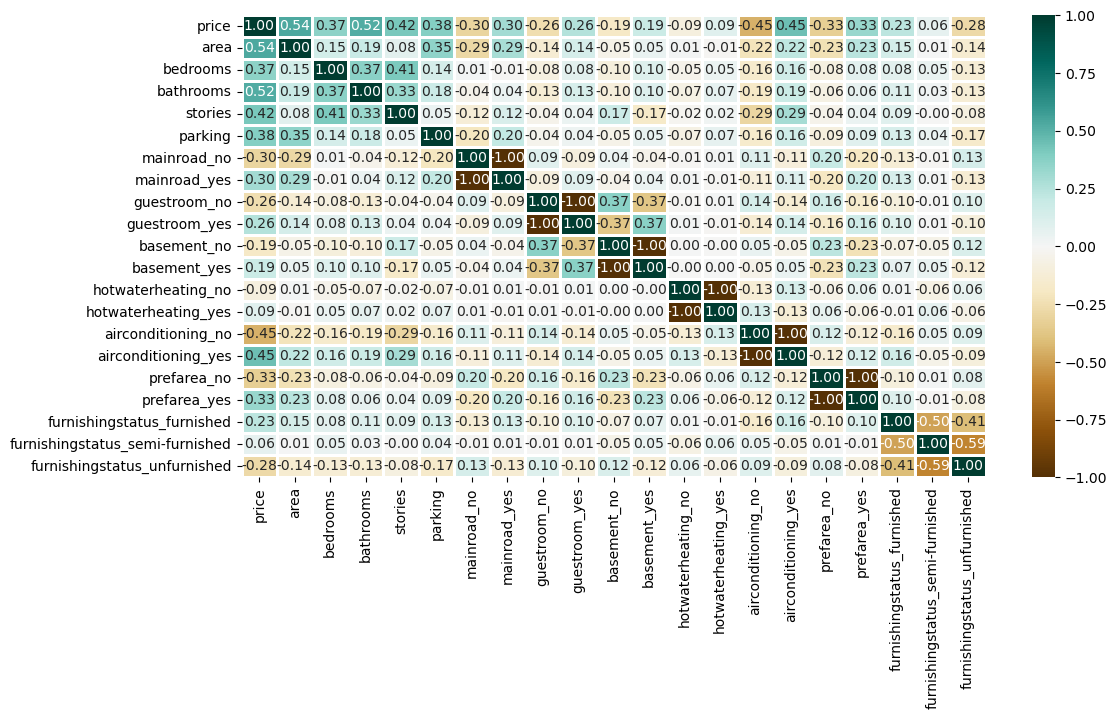

In [12]:
# exploring and ploting the data

plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

In [13]:
# preprocessing the datas

x=df.iloc[:,2:]

In [14]:
x

,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,4,2,3,2,False,True,True,False,True,False,True,False,False,True,False,True,True,False,False
1,4,4,4,3,False,True,True,False,True,False,True,False,False,True,True,False,True,False,False
2,3,2,2,2,False,True,True,False,False,True,True,False,True,False,False,True,False,True,False
3,4,2,2,3,False,True,True,False,False,True,True,False,False,True,False,True,True,False,False
4,4,1,2,2,False,True,False,True,False,True,True,False,False,True,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,2,1,1,2,False,True,True,False,False,True,True,False,True,False,True,False,False,False,True
541,3,1,1,0,True,False,True,False,True,False,True,False,True,False,True,False,False,True,False
542,2,1,1,0,False,True,True,False,True,False,True,False,True,False,True,False,False,False,True
543,3,1,1,0,True,False,True,False,True,False,True,False,True,False,True,False,True,False,False


In [15]:
y=df.iloc[:,0]

In [16]:
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [17]:
#Splitting Dataset into Training and Testing data

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=50)

In [18]:
model=LinearRegression()

In [19]:
model.fit(x_train,y_train)

LinearRegression()

In [20]:
predict=model.predict(x_test)

In [21]:
predict

array([ 3842818.40423859,  7829323.48940331,  3684277.55072432,
        2805944.6809531 ,  3012157.71709962,  6501755.56159076,
        6152716.46820833,  4522181.437158  ,  3907771.21125321,
        5139003.47595497,  2668269.27708356,  4098244.62808803,
        2805944.6809531 ,  5245008.09648621,  4073794.38668825,
        3830340.79522942,  5222861.5300566 ,  4750869.80691376,
        5903493.30768392,  6827684.04022849,  4902793.08379085,
        6006996.25465627,  3564574.48031007,  3564574.48031007,
        4660193.56033055,  2805944.6809531 ,  5532790.50109683,
        3259970.38229069,  5493506.15910015,  2805944.6809531 ,
        4109282.48865779,  4498101.55512188,  4334265.08169281,
        5759119.20940436,  7111410.31652617,  3230251.84938673,
        2806630.07837598,  6229421.78632165,  4843518.62813166,
        4710492.97502018,  4065586.96685701,  2442561.58613807,
        4138303.2520619 ,  7149590.09712024,  3609351.84214295,
        5215102.65890644,  3435779.48811

In [22]:
print(r2_score(predict,y_test))

0.56029004043513
